In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from numpy import argmax
from datetime import datetime
from sklearn.metrics import r2_score,mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor

# Confusion Matrix and Evaluation
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc


In this CAPSTONE, I want to predict the amount of crops that are being produce in the world. The most important source of energy that every human need is carbs. Of course, there are a variety of carbs in the world but the main carbs that we use daily stays the same such as rice, wheat and corn. Therefore, I would want to see whether the supply and demand will be enough.

These are Regressor that I want to do
<br>1. Gradient Boosting Regressor
<br>2. Random Forest Regressor
<br>3. OLS (Same with 4 , no need go to STATModel)
<br>4. Linear Regression from Sklearn
<br>5. Decision Tree Regressor

# Gathering and Cleaning DATA

In [2]:
#Downloading dataset 
totalyield = pd.read_csv(r"C:\Users\sastr\Desktop\Classes\Online Course\Brain Station\CAPSTONE\FAO yield crops(Production).csv")

C:\Users\sastr\Anaconda3\envs\Boosting\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
price = pd.read_csv(r"C:\Users\sastr\Desktop\Classes\Online Course\Brain Station\CAPSTONE\datasets_677484_1190624_agricultural_raw_material.csv")

In [4]:
pesticide = pd.read_csv(r"C:\Users\sastr\Desktop\Classes\Online Course\Brain Station\CAPSTONE\pesticide.csv")

In [5]:
totalyield

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QC,Crops,2,Afghanistan,5419,Yield,221,"Almonds, with shell",1976,1976,hg/ha,16610.0,Fc,Calculated data,NaN
1,QC,Crops,2,Afghanistan,5419,Yield,221,"Almonds, with shell",1977,1977,hg/ha,15000.0,Fc,Calculated data,NaN
2,QC,Crops,2,Afghanistan,5419,Yield,221,"Almonds, with shell",1978,1978,hg/ha,20000.0,Fc,Calculated data,NaN
3,QC,Crops,2,Afghanistan,5419,Yield,221,"Almonds, with shell",1979,1979,hg/ha,17500.0,Fc,Calculated data,NaN
4,QC,Crops,2,Afghanistan,5419,Yield,221,"Almonds, with shell",1980,1980,hg/ha,17069.0,Fc,Calculated data,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746037,QC,Crops,5817,Net Food Importing Developing Countries,5419,Yield,1735,Vegetables Primary,2014,2014,hg/ha,117847.0,Fc,Calculated data,NaN
746038,QC,Crops,5817,Net Food Importing Developing Countries,5419,Yield,1735,Vegetables Primary,2015,2015,hg/ha,118811.0,Fc,Calculated data,NaN
746039,QC,Crops,5817,Net Food Importing Developing Countries,5419,Yield,1735,Vegetables Primary,2016,2016,hg/ha,117457.0,Fc,Calculated data,NaN
746040,QC,Crops,5817,Net Food Importing Developing Countries,5419,Yield,1735,Vegetables Primary,2017,2017,hg/ha,116865.0,Fc,Calculated data,NaN


In [6]:
totalyield.Flag.unique(),totalyield.Note.unique()

(array(['Fc', nan], dtype=object),
 array([nan, 'Kurdistan region is excluded'], dtype=object))

In [7]:
#Checking the row and column there are
totalyield.shape

(746042, 15)

In [8]:
#Checking the column and row
pesticide.shape

(4287, 14)

Now, I will be dropping some column. Just to make sure the data looks clean. I will drop column such as Area code, Domain, Item Code, etc. I will also rename value to hg/ha_yield, because the column is basically on how much each items weight.

In [9]:
del totalyield['Domain Code']
del totalyield['Domain']
del totalyield['Area Code']
del totalyield['Element Code']
del totalyield['Element']
del totalyield['Year Code']
del totalyield['Unit']
del totalyield['Flag']
del totalyield['Flag Description']
del totalyield['Note']
del totalyield['Item Code']

In [10]:
totalyield.head()

,Area,Item,Year,Value
0,Afghanistan,"Almonds, with shell",1976,16610.0
1,Afghanistan,"Almonds, with shell",1977,15000.0
2,Afghanistan,"Almonds, with shell",1978,20000.0
3,Afghanistan,"Almonds, with shell",1979,17500.0
4,Afghanistan,"Almonds, with shell",1980,17069.0


### Yield Data

In [11]:
#renaming the column just to make it easier for me to see the unit
# del totalyield['Area']
totalyield.rename(columns = {'Value':'kg_yield'}, inplace = True) 
totalyield['kg_yield'] =  totalyield['kg_yield'] / 1000
# totalyield['Year'] = pd.to_datetime(totalyield['Year'])
# totalyield['Year'] = pd.DatetimeIndex(totalyield['Year']).year
totalyield.head()

,Area,Item,Year,kg_yield
0,Afghanistan,"Almonds, with shell",1976,16.610
1,Afghanistan,"Almonds, with shell",1977,15.000
2,Afghanistan,"Almonds, with shell",1978,20.000
3,Afghanistan,"Almonds, with shell",1979,17.500
4,Afghanistan,"Almonds, with shell",1980,17.069


In [12]:
#Creating a boolean
totalyield2014 = totalyield[totalyield['Year']==2014]
totalyield2014

,Area,Item,Year,kg_yield
38,Afghanistan,"Almonds, with shell",2014,19.996
71,Afghanistan,"Anise, badian, fennel, coriander",2014,7.167
129,Afghanistan,Apples,2014,73.000
187,Afghanistan,Apricots,2014,99.944
245,Afghanistan,Barley,2014,15.213
...,...,...,...,...
745805,Net Food Importing Developing Countries,Oilcrops,2014,13.609
745863,Net Food Importing Developing Countries,"Pulses, Total",2014,8.214
745921,Net Food Importing Developing Countries,"Roots and Tubers, Total",2014,91.035
745979,Net Food Importing Developing Countries,"Treenuts, Total",2014,5.177


In [13]:
totalyield2014.groupby(['Area']).max()

,Item,Year,kg_yield
Area,,,
Afghanistan,Wheat,2014,233.900
Africa,Yams,2014,987.732
Albania,Wheat,2014,376.253
Algeria,Wheat,2014,1166.888
American Samoa,Yams,2014,74.814
...,...,...,...
Western Sahara,"Coarse Grain, Total",2014,5.429
World,Yautia (cocoyam),2014,3667.818
Yemen,Wheat,2014,157.261


In [14]:
#Check online
totalyield2014.groupby(['Area','Item']).sum()['kg_yield']

Area         Item                            
Afghanistan  Almonds, with shell                 19.996
             Anise, badian, fennel, coriander     7.167
             Apples                              73.000
             Apricots                            99.944
             Barley                              15.213
                                                  ...  
Zimbabwe     Treenuts, Total                     15.254
             Vanilla                              4.283
             Vegetables Primary                  73.753
             Vegetables, fresh nes               69.920
             Wheat                               22.094
Name: kg_yield, Length: 15043, dtype: float64

Since I have these two data, Pesticide and Yield, I would like to merge them together by year. But they sem not to have the same year in both data set. So now , I would like to check what year to what year it start and end.
<br>Pesticide only have from year 1990 to 2017
<br>Totalyield only have 1977 to 2018

### Pesticide data

In [15]:
#Now , I am going to drop the columns that are not important at all.
del pesticide['Domain Code']
del pesticide['Domain']
del pesticide['Area Code']
del pesticide['Element Code']
del pesticide['Element']
del pesticide['Item Code']
del pesticide['Year Code']
del pesticide['Item']
del pesticide['Unit']
del pesticide['Flag']
del pesticide['Flag Description']
# del pesticide['Area']
pesticide.rename(columns = {'Value':'pesticides_tonnes'}, inplace = True) 
pesticide.head()
# totalyield.head()

,Area,Year,pesticides_tonnes
0,Albania,1990,0.17
1,Albania,1991,0.17
2,Albania,1992,0.17
3,Albania,1993,0.17
4,Albania,1994,0.29


### Temperature Data

In [16]:
Temperature = pd.read_csv(r"C:\Users\sastr\Desktop\Classes\Online Course\Brain Station\CAPSTONE\29_2150_compressed_GlobalLandTemperaturesByCountry.csv\GlobalLandTemperaturesByCountry.csv")
# Temperature.rename(columns = {'dt':'Year'}, inplace = True) 
Temperature.rename(columns = {'AverageTemperature':'avgTemp'}, inplace = True) 
del Temperature['AverageTemperatureUncertainty']
Temperature.head()

,dt,avgTemp,Country
0,1743-11-01,4.384,Åland
1,1743-12-01,NaN,Åland
2,1744-01-01,NaN,Åland
3,1744-02-01,NaN,Åland
4,1744-03-01,NaN,Åland


As you can see from Above, there is a problem as the Avg temperature have a lot of null values. So I will replace all null value with the median of the column.

In [17]:
Temperature.fillna(Temperature['avgTemp'].median(), inplace = True)
Temperature.head()

,dt,avgTemp,Country
0,1743-11-01,4.384,Åland
1,1743-12-01,20.901,Åland
2,1744-01-01,20.901,Åland
3,1744-02-01,20.901,Åland
4,1744-03-01,20.901,Åland


In [18]:
#Converting the Year column into a datatime type
Temperature['dt'] = pd.to_datetime(Temperature['dt'])
Temperature.head()
Temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   dt       577462 non-null  datetime64[ns]
 1   avgTemp  577462 non-null  float64       
 2   Country  577462 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 13.2+ MB


In [19]:
# Temperature['dt'].dt.year

In [20]:
#Making a new column for the year
Temperature['Year'] = pd.DatetimeIndex(Temperature['dt']).year
del Temperature['dt']
Temperature.head()

,avgTemp,Country,Year
0,4.384,Åland,1743
1,20.901,Åland,1743
2,20.901,Åland,1744
3,20.901,Åland,1744
4,20.901,Åland,1744


In [21]:
Temperature.shape

(577462, 3)

In [22]:
# splitted = []
# for row in Temperature['dt']:
#     splitted.append(row.split()[0])

### Rainfall Data

In [23]:
Rainfall = pd.read_csv(r"C:\Users\sastr\Desktop\Classes\Online Course\Brain Station\CAPSTONE\average-precipitation-per-year.csv")
Rainfall.rename(columns = {'Average precipitation in depth (mm per year) (mm per year)':'avg_rain_fall_mm'}, inplace = True)
Rainfall.rename(columns = {'Entity':'Area'}, inplace = True) 
del Rainfall['Code']
Rainfall.head()

,Area,Year,avg_rain_fall_mm
0,Afghanistan,1962,327
1,Afghanistan,1967,327
2,Afghanistan,1972,327
3,Afghanistan,1977,327
4,Afghanistan,1982,327


In [24]:
#Now we got a clean dataset. Since my data is just seeing the production of food in a global scale, 
#I am going to get rid of area too
del totalyield['Area']
del pesticide['Area']
del Rainfall['Area']
del Temperature['Country']

In [25]:
# pesticide['Year'] , totalyield['Year']

## Grouping

In [26]:
#Grouping by two column, Item and year in a global scale
groupy = totalyield.groupby(['Year','Item']).sum()
groupy = groupy.reset_index()
groupy.head()

,Year,Item,kg_yield
0,1961,Agave fibres nes,155.268
1,1961,"Almonds, with shell",411.964
2,1961,"Anise, badian, fennel, coriander",542.942
3,1961,Apples,8733.353
4,1961,Apricots,3986.095


In [27]:
#Finding the total amount of pesticide use every year
groupp = pesticide.groupby(['Year']).sum()
groupp.head() , groupp.shape

(      pesticides_tonnes
 Year                   
 1990             292.43
 1991             286.62
 1992             303.01
 1993             310.51
 1994             314.01,
 (28, 1))

In [28]:
#Grouping by temperature by year and get the average of every year
groupt = Temperature.groupby(['Year']).mean()
groupt.head() , groupt.shape

(        avgTemp
 Year           
 1743  13.042570
 1744  13.525598
 1745  14.396375
 1746  20.901000
 1747  20.901000,
 (271, 1))

In [29]:
#grouping Rainfall to get the mean
groupr = Rainfall.groupby(['Year']).mean()
groupr

,avg_rain_fall_mm
Year,
1962,1236.576923
1967,1236.576923
1972,1236.576923
1977,1236.576923
1982,1236.576923
1987,1236.576923
1992,1141.851064
1997,1125.151832
2002,1125.151832


# Combining data

*Remember*
<br>Pesticide only have from year 1990 to 2017
<br>Totalyield only have 1977 to 2018

In [30]:
# Combine1.groupby(['','Year']).mean()

In [31]:
groupy.head()

,Year,Item,kg_yield
0,1961,Agave fibres nes,155.268
1,1961,"Almonds, with shell",411.964
2,1961,"Anise, badian, fennel, coriander",542.942
3,1961,Apples,8733.353
4,1961,Apricots,3986.095


In [32]:
# groupt[].unstack(level=-1)
# Temperature[''] = pd.DatetimeIndex(Temperature['dt']).year


In [33]:
# Combining
combine1 = groupy.merge(groupp,how = 'right',on = 'Year')
combine1.head()

,Year,Item,kg_yield,pesticides_tonnes
0,1990,Agave fibres nes,175.636,292.43
1,1990,"Almonds, with shell",930.866,292.43
2,1990,"Anise, badian, fennel, coriander",594.045,292.43
3,1990,Apples,13189.133,292.43
4,1990,Apricots,6451.783,292.43


In [34]:
combine1.shape, print(combine1.isna().sum())

Year                 0
Item                 0
kg_yield             0
pesticides_tonnes    0
dtype: int64


((4778, 4), None)

In [35]:
#Combining (yield+pesticide) with temperature
combine2 = combine1.merge(groupt,how = 'inner',on = 'Year')
combine2.head()

,Year,Item,kg_yield,pesticides_tonnes,avgTemp
0,1990,Agave fibres nes,175.636,292.43,19.324202
1,1990,"Almonds, with shell",930.866,292.43,19.324202
2,1990,"Anise, badian, fennel, coriander",594.045,292.43,19.324202
3,1990,Apples,13189.133,292.43,19.324202
4,1990,Apricots,6451.783,292.43,19.324202


In [36]:
# combine2.shape , 
print(combine2.isna().sum())

Year                 0
Item                 0
kg_yield             0
pesticides_tonnes    0
avgTemp              0
dtype: int64


In [37]:
combine = combine2.merge(groupr,how = 'left',on = 'Year')
combine.head()

,Year,Item,kg_yield,pesticides_tonnes,avgTemp,avg_rain_fall_mm
0,1990,Agave fibres nes,175.636,292.43,19.324202,NaN
1,1990,"Almonds, with shell",930.866,292.43,19.324202,NaN
2,1990,"Anise, badian, fennel, coriander",594.045,292.43,19.324202,NaN
3,1990,Apples,13189.133,292.43,19.324202,NaN
4,1990,Apricots,6451.783,292.43,19.324202,NaN


In [38]:
#As you can see, there are a lot of Null value for my average Rainfall and I will fil it up with the median of it
#Taking median is better than taking the mean as it is less prone to outlier
combine.fillna(combine['avg_rain_fall_mm'].median(), inplace = True)
combine.head()

,Year,Item,kg_yield,pesticides_tonnes,avgTemp,avg_rain_fall_mm
0,1990,Agave fibres nes,175.636,292.43,19.324202,1125.151832
1,1990,"Almonds, with shell",930.866,292.43,19.324202,1125.151832
2,1990,"Anise, badian, fennel, coriander",594.045,292.43,19.324202,1125.151832
3,1990,Apples,13189.133,292.43,19.324202,1125.151832
4,1990,Apricots,6451.783,292.43,19.324202,1125.151832


In [39]:
#Checking if there is any null value
print(combine.isna().sum())
# combine.info()

Year                 0
Item                 0
kg_yield             0
pesticides_tonnes    0
avgTemp              0
avg_rain_fall_mm     0
dtype: int64


In [40]:
# combineall =combine.groupby(['Year']).sum
# combineall

In [41]:
#I just want to check on when the df start and end. Start on 1990 and end on 2013
combine.describe()

,Year,kg_yield,pesticides_tonnes,avgTemp,avg_rain_fall_mm
count,4094.000000,4.094000e+03,4094.000000,4094.000000,4094.000000
mean,2001.517098,1.035801e+04,360.786219,19.397958,1125.614107
std,6.921364,4.456074e+04,47.426635,0.240060,3.556429
min,1990.000000,8.000000e+00,286.620000,18.938907,1119.617801
25%,1996.000000,6.580915e+02,322.330000,19.273794,1125.151832
50%,2002.000000,2.595742e+03,360.000000,19.431376,1125.151832
75%,2008.000000,9.427912e+03,410.660000,19.551960,1125.151832
max,2013.000000,1.736567e+06,438.440000,19.984697,1141.851064


In [42]:
# combineall =combine.groupby(['Item']).sum
# combineall.head()
# combine['Year'] = pd.to_datetime(combine['Year'])
# combine.info()

In [43]:
# combine.head()

## Checking for Multicol

Before we get to detail, let us make a heatmap and see any multicoll in the variables
<br>1. Gradient Boosting Regressor
<br>2. Random Forest Regressor
<br>3. OLS 

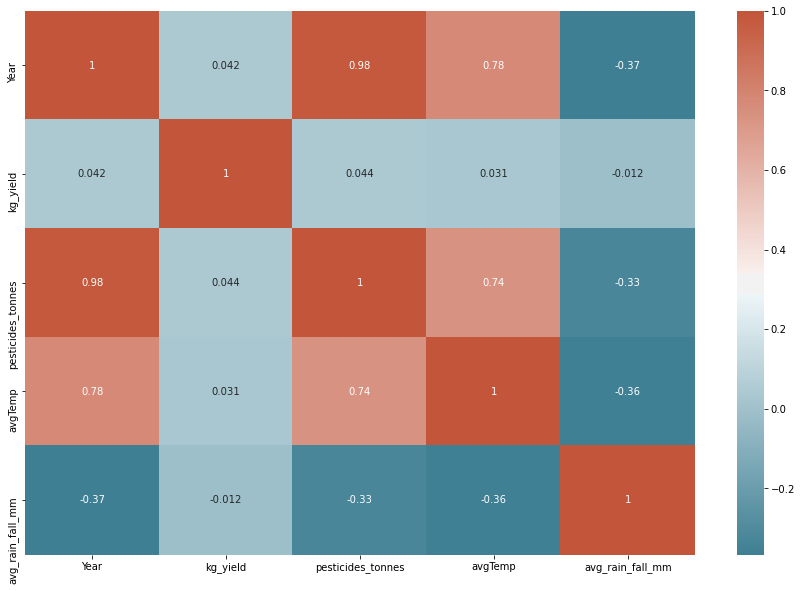

In [44]:
#Heatmap of the one that have not been One Hot Encoded, just get to know the data more
corr = combine.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,annot=True,
            cmap=sns.diverging_palette(220,20,as_cmap=True))

Multicol on certain variables!! (ASK EDUCATOR)

## Preparing for Modelling

###### Since I have some categorical variables, I will be using *One Hot Encoding* to make numerical

In [45]:
Itembinary = pd.get_dummies(combine.Item)
Itembinary.head()

,Agave fibres nes,"Almonds, with shell","Anise, badian, fennel, coriander",Apples,Apricots,Areca nuts,Artichokes,Asparagus,Avocados,Bambara beans,...,Vanilla,Vegetables Primary,"Vegetables, fresh nes","Vegetables, leguminous nes",Vetches,"Walnuts, with shell",Watermelons,Wheat,Yams,Yautia (cocoyam)
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
numericalcombine = pd.concat([combine,Itembinary], axis = 1)
del numericalcombine['Item']
numericalcombine

,Year,kg_yield,pesticides_tonnes,avgTemp,avg_rain_fall_mm,Agave fibres nes,"Almonds, with shell","Anise, badian, fennel, coriander",Apples,Apricots,...,Vanilla,Vegetables Primary,"Vegetables, fresh nes","Vegetables, leguminous nes",Vetches,"Walnuts, with shell",Watermelons,Wheat,Yams,Yautia (cocoyam)
0,1990,175.636,292.43,19.324202,1125.151832,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1990,930.866,292.43,19.324202,1125.151832,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1990,594.045,292.43,19.324202,1125.151832,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1990,13189.133,292.43,19.324202,1125.151832,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1990,6451.783,292.43,19.324202,1125.151832,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4089,2013,2366.552,434.11,19.984697,1125.151832,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4090,2013,34846.794,434.11,19.984697,1125.151832,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4091,2013,5046.157,434.11,19.984697,1125.151832,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4092,2013,8114.439,434.11,19.984697,1125.151832,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


###### Standardizing Feature Variables

In [47]:
#Features
X = numericalcombine.drop(['kg_yield'], axis = 1)
#Label
y = numericalcombine['kg_yield']
feature_list = list(X.columns)

In [48]:
#Scale the training set
MinMax = MinMaxScaler()
MinMax = MinMax.fit(X)

###### Splitting the data

In [49]:
from sklearn.model_selection import train_test_split
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=.20, random_state=1)

In [50]:
X_train, X_validation, y_train, y_validation = train_test_split(X_remainder, y_remainder, test_size = 0.3, random_state=1)

## Random Forest Regressor

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3070, 175), (1024, 175), (3070,), (1024,))

In [53]:
# Model evaluation
#,('LinReg',LinearRegression())
from sklearn.linear_model import LinearRegression
pipe = Pipeline([('scl', StandardScaler()),
    ('clf', RandomForestRegressor(random_state = 0))])

pipe.fit(X_train, y_train)

pipe.score(X_train, y_train)

# Using grid search to find the best paramater for C
param_grid = {
    #Get rid of Max Depth cause it wont allow it to overfit
    #'clf__max_depth': [i for i in range(1,50,2)],
    'clf__n_estimators': [50,100,150,200],
    'clf__min_samples_leaf' : [1,2]
}

searchRF = GridSearchCV(pipe, param_grid, n_jobs=-1, verbose = True)
searchRF.fit(X_train, y_train)

RFr2 = r2_score(y_test, searchRF.best_estimator_.predict(X_test))

print("Best parameter (CV score=%0.3f):" % searchRF.best_score_)
print(searchRF.best_params_)
print("R SQUARED:",RFr2*100)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.8min finished


Best parameter (CV score=0.656):
{'clf__min_samples_leaf': 2, 'clf__n_estimators': 150}
R SQUARED: 76.80365272568942


## Gradient Boosting Regressor

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3070, 175), (1024, 175), (3070,), (1024,))

In [56]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
# Model evaluation
pipe = Pipeline([('scl', StandardScaler()),
    ('clf', GradientBoostingRegressor(random_state = 0))])

pipe.fit(X_train, y_train)

pipe.score(X_train, y_train)

# Using grid search to find the best paramater for C
param_grid = {
    'clf__max_depth': [i for i in range(1,30,2)],
    'clf__n_estimators': [50,100,150,200],
    'clf__min_samples_leaf' : [1,2]
}


searchGB = GridSearchCV(pipe, param_grid, n_jobs=-1, verbose = True)
searchGB.fit(X_train, y_train)
GBr2 = r2_score(y_test, searchGB.best_estimator_.predict(X_test))
print("Best parameter (CV score=%0.3f):" % searchGB.best_score_)
print(searchGB.best_params_)
print("R SQUARED:",GBr2*100)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  9.6min


KeyboardInterrupt: 

### Linear Regression (OLS)

In [ ]:
numericalcombine

As you can see from the previous heatmap where I have not One Hot encoded, there is many multicol inside it. to avoid such thing, I will be doing PCA 1 and PCA 2 in the data set just to make sure that it is able to work and only get variables with the highest variance. You will definitely need PCA as I have 4094 rows and 176 columns

### Linear Regression Assumptions
When fitting a linear regression model, we make the following assumptions:
* There is a linear relationship between the dependent and independent variables
* The independent variables are independent of each other (no multicollinearity)
* Residuals are normally distributed
* Homoscedasticity: Variance of error terms are similar across the values of the independent variables
The first two are usually checked before the model is fit, while the last two are checked after the model is fit. This is a process that's called performing model diagnostics.

In [ ]:
#Features
LR_X = numericalcombine.drop(['kg_yield'], axis = 1)
#Label
LR_y = numericalcombine['kg_yield']

In [ ]:
from sklearn.decomposition import PCA
X_train, X_test, y_train, y_test = train_test_split(LR_X, LR_y,test_size=0.2, random_state = 10)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
pca = PCA(n_components = 8)
X_pca = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    print('CV Mean or R-Squared Value: ', np.mean(scores)*100)
    print('STD: ', np.std(scores))
    print('\n')

In [ ]:
from sklearn.linear_model import LinearRegression
# Train model
lr = LinearRegression().fit(X_pca, y_train)
# get cross val scores
get_cv_scores(lr)
lr.score(X_pca_test,y_test)

In [ ]:
#Get residual and save it
y_test_predict = lr.predict(X_pca_test)
#Now we are doing our residual
np.mean(y_test - y_test_predict)

In [ ]:
def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

In [ ]:
plt.hist(reject_outliers(y_test - y_test_predict),bins=20)
#It is not normally distributed, it looks like Chi Squared

Linear Regression doesnt work as it does not have normally distributed residual as you can se from the plot itself.

The best Regression model that I have train are Random forest with R squared of 76.8%

###### Seeing Features of importance on Random Forest Regression

In [ ]:
feat_importances = pd.Series(searchRF.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))